<a href="https://colab.research.google.com/github/DSParkGeunho/Regression-analysis-for-fifa23/blob/main/CAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##eli5 라이브러리는 모델을 학습시킨후 변수의 중요도를 파악하는데 쓰임. Permutation Feature importance.
##참고로 permutationimportance는 모델의 특정 feature를 제거하는 대신 feature의 value를 무작위로 섞어서 노이즈로 만들고 예측값과 실제값을 비교하여 변수의 중요도측정
##각 feature의 중요도 안에 다른 feature와의 교호작용도 포함되어 있기 때문에 기존의 영향을 주던 교호작용 역시 삭제될것
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 9.9 MB/s 
     |████████████████████████████████| 133 kB 59.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=017830679d51dddb0c22ca827e21ed3b63aa6dd96b941812f4fd8f1f6770c64b
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np ##linear algebra
import pandas as pd ##file읽기, 행,열,매트릭스 단위 데이터 처리
import seaborn as sns ##그래프 시각화
import matplotlib.pyplot as plt ##그래프 시각화
import eli5 ##permutation importance
from eli5.sklearn import PermutationImportance
from collections import Counter ##컨테이너형 자료(dict,list,set,tuple)를 편하게 관리하기 위한 라이브러리
import missingno as msno ##그래프 시각화

import warnings
warnings.filterwarnings('ignore')
import plotly ##그래프 시각화
sns.set_style('darkgrid')

In [ ]:
##데이터프레임 불러오기
df=pd.read_csv('/content/drive/MyDrive/data/CAM.csv')

In [ ]:
df

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,218667,Bernardo Silva,Bernardo Mota Carvalho e Silva,27,173,64,https://cdn.sofifa.net/players/218/667/23_60.png,Portugal,88,88,...,88,86,88,79,77,79,75,67,75,21
2,189596,T. Müller,Thomas Müller,32,185,76,https://cdn.sofifa.net/players/189/596/23_60.png,Germany,87,87,...,86,85,86,74,74,74,72,66,72,23
3,211110,P. Dybala,Paulo Dybala,28,177,75,https://cdn.sofifa.net/players/211/110/23_60.png,Argentina,86,86,...,86,84,86,68,66,68,64,54,64,17
4,212198,Bruno Fernandes,Bruno Miguel Borges Fernandes,27,179,69,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,86,86,...,86,86,86,81,82,81,79,74,79,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,271152,M. Furaih,Mohammed Furaih,22,162,60,https://cdn.sofifa.net/players/271/152/23_60.png,Saudi Arabia,48,57,...,50,45,50,39,36,39,37,29,37,17
2307,269923,J. Russell-Rowe,Jacen Russell-Rowe,19,183,73,https://cdn.sofifa.net/players/269/923/23_60.png,Canada,48,65,...,50,45,50,36,33,36,34,29,34,18
2308,257934,Guo Yunqi,Yunqi Guo,25,175,66,https://cdn.sofifa.net/players/257/934/23_60.png,China PR,48,51,...,49,50,49,49,50,49,50,49,50,17
2309,269066,Pi Ziyang,Ziyang Pi,19,175,70,https://cdn.sofifa.net/players/269/066/23_60.png,China PR,47,60,...,50,49,50,47,48,47,47,46,47,18


In [ ]:
df.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

In [ ]:
##골키퍼가 아닌 포지션들은 골키퍼 관련 능력치까지 삭제
df.drop(['ID','BestPosition', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal','STRating', 'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating',
       'CAMRating', 'LMRating', 'CMRating', 'RMRating', 'LWBRating',
       'CDMRating', 'RWBRating', 'LBRating', 'CBRating', 'RBRating',
       'GKRating','GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Overall', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

In [ ]:
df

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,91,84,90,70,91,88,95,93,93,90,...,91,44,40,93,94,75,96,20,35,24
1,88,85,79,51,89,78,92,85,67,77,...,78,75,60,83,85,68,90,59,71,53
2,87,85,88,81,85,84,77,81,59,79,...,82,62,58,96,86,70,84,47,57,46
3,86,82,83,58,86,88,90,89,88,79,...,89,43,42,82,91,84,79,32,41,39
4,86,85,83,64,88,87,79,87,85,88,...,88,80,64,86,91,90,79,66,73,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,48,42,39,28,47,30,52,42,42,43,...,38,42,17,40,44,36,43,18,21,16
2307,48,28,50,41,46,45,61,44,34,39,...,44,32,12,39,50,56,48,11,11,17
2308,48,39,32,42,54,24,45,34,34,46,...,34,51,53,45,53,41,40,43,48,44
2309,47,36,31,44,57,33,49,32,34,54,...,31,55,40,49,41,36,38,38,38,43


In [ ]:
print(len(df))
print(len(df.columns))

2311
30


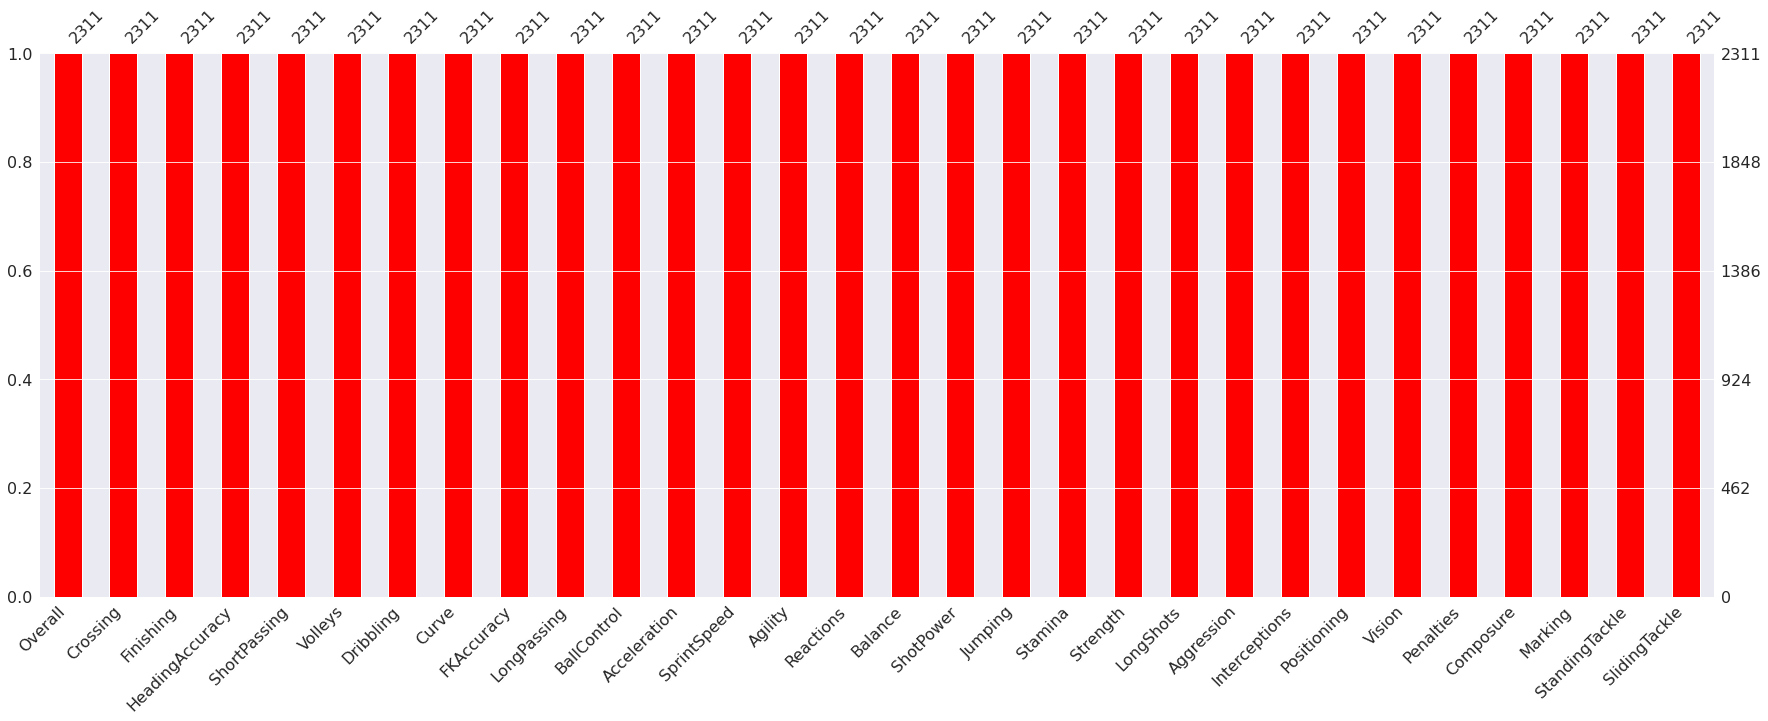

In [ ]:
##missingno 라이브러리를 이용해서 결측치 확인 및 시각화
msno.bar(df.sample(2311),(30,10),color='red')

In [ ]:
##각 column의 평균값을 담을 stat_mean (series 객체)생성
stat_mean=df.mean()
stat_mean

Overall            65.389875
Crossing           57.603202
Finishing          59.073129
HeadingAccuracy    47.875379
ShortPassing       67.093466
Volleys            53.095197
Dribbling          68.041973
Curve              60.040242
FKAccuracy         55.868455
LongPassing        62.585028
BallControl        67.959325
Acceleration       71.293812
SprintSpeed        69.284725
Agility            73.720467
Reactions          61.446993
Balance            74.124189
ShotPower          63.051926
Jumping            58.517958
Stamina            62.534401
Strength           55.385115
LongShots          59.870619
Aggression         52.748161
Interceptions      43.938555
Positioning        62.005625
Vision             65.070100
Penalties          56.094764
Composure          62.527045
Marking            43.748594
StandingTackle     46.750325
SlidingTackle      44.042406
dtype: float64

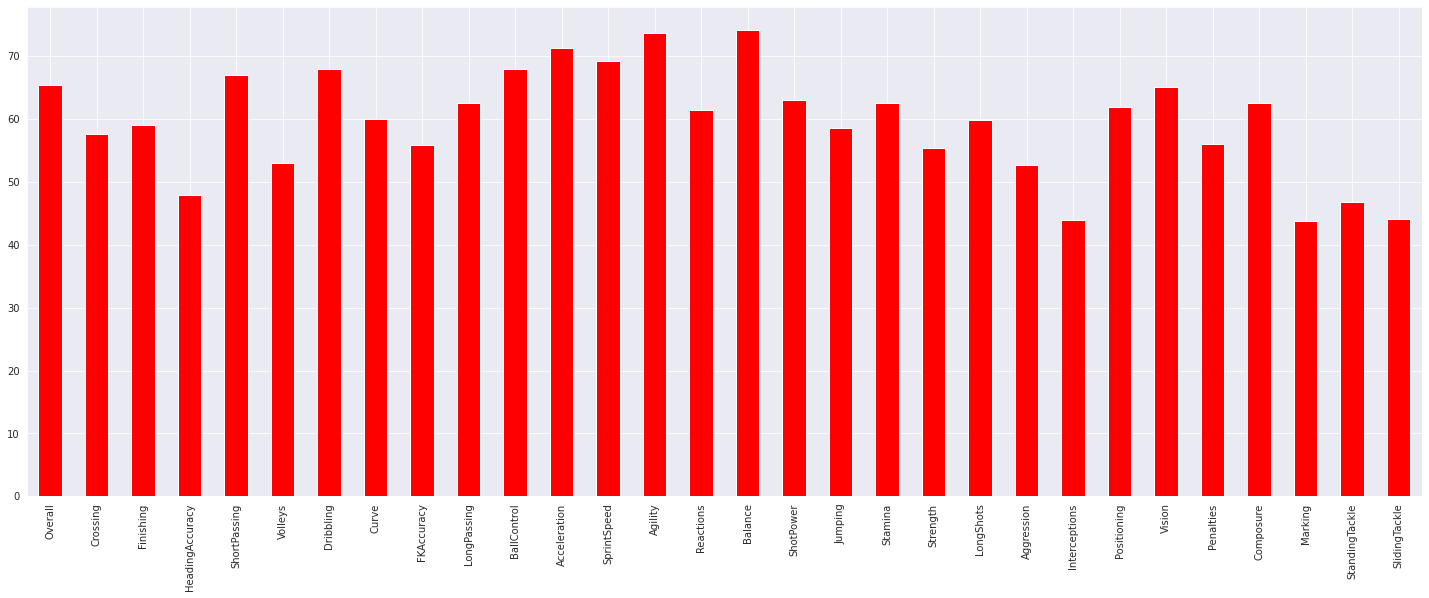

In [ ]:
##그래프 사이즈 변경 스탯별 평균을 막대그래프로 시각화
plt.rcParams['figure.figsize'] = (25, 9)
stat_mean.plot(kind='bar', color='red')

In [ ]:
##top_features에는 stat_mean안의 가장 큰 5개의 값 저장
top_features=dict(stat_mean.nlargest(5))
print(top_features)

{'Balance': 74.12418866291648, 'Agility': 73.7204673301601, 'Acceleration': 71.29381220250974, 'SprintSpeed': 69.28472522717438, 'Dribbling': 68.0419731717871}


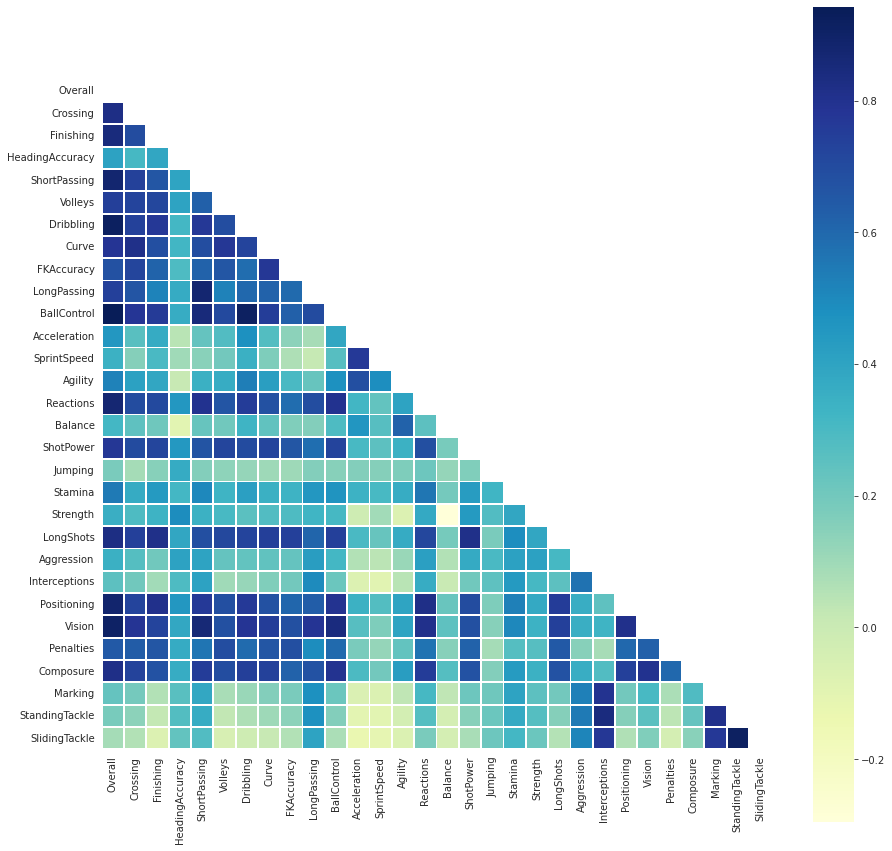

In [ ]:
##correlation표 만들기
corr=df.corr()
##lower triangle을 만들어주기 위해 만들었음
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
##seaborn 라이브러리 그래프그리기
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (15,15))
    ##히트맵:상관계수 그리는 method
    ax= sns.heatmap(corr, mask=mask, square=True, linewidths=.8, cmap="YlGnBu")

In [ ]:
##overall과의 상관계수, 회귀계수 표현할 때 만들 딕셔너리에 들어갈 리스트
features=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

In [ ]:
## overall과의 상관계수중 0.8이 넘는애들만 가져오는것
def high_score(corr):
    for i in range(len(corr)-1):
        if corr['Overall'][i+1]>0.8:
            print(features[i],":", corr['Overall'][i+1])

high_score(corr)

Crossing : 0.8234887197069083
Finishing : 0.8467555964144128
ShortPassing : 0.8840371127683986
Dribbling : 0.9188652781688625
BallControl : 0.9424216117441271
Reactions : 0.8726653038961117
LongShots : 0.8265808386087065
Positioning : 0.8880011549197158
Vision : 0.9060133586947557
Composure : 0.8210091662590764


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["vif"]= [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif["features"]= df1.columns
vif=vif.round(2)
vif= vif.sort_values(by="vif")
vif

,vif,features
20,40.19,Aggression
16,40.20,Jumping
26,44.25,Marking
18,46.28,Strength
21,47.34,Interceptions
2,50.41,HeadingAccuracy
17,56.54,Stamina
7,78.01,FKAccuracy
24,84.19,Penalties
4,86.09,Volleys


In [ ]:
## 타겟변수는 Overall, 회귀분석을 위해 Overall을 제외한 df1 데이터프레임 생성
target = df.Overall
df1=df.drop(['Overall'], axis=1)

In [ ]:
##사이킷런의 train, test 데이터 분할
##X_train은 80%데이터, X_test는 테스트할 데이터 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, target, test_size=0.2)

In [ ]:
## 원핫인코딩 문자를 숫자로 바꾸어주는 기법(0,1 만을 사용하여 만들어줌), 근데 나는 어차피 전부 연속형 자료라 크게 의미 없는듯
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape, X_train.shape)
print(y_test.shape, y_train.shape)

(463, 29) (1848, 29)
(463,) (1848,)


In [ ]:
##사이킷런의 선형회귀 모델 사용
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
##데이터 적용
model.fit(X_train, y_train)
##회귀분석한 결과가 prediction에 저장
predictions = model.predict(X_test)

In [ ]:
# X_train
# X_test
y_train

280     74
1583    62
2003    57
1842    60
1872    59
        ..
50      80
292     74
1291    64
1026    66
2168    54
Name: Overall, Length: 1848, dtype: int64

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
##결정계수: 독립변수가 종속변수를 얼마나 잘 설명해주느냐
print('r2 score: '+str(r2_score(y_test, predictions)))
##평균제곱오차에 루트 씌운것
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9866794494658535
RMSE : 0.8136108897708006


In [ ]:
## 수정된 결정계수 함수
def adj_r2_score(y_test, predictions, p=X_train.shape[1]):
    return 1-(1-r2_score(y_test, predictions)) * (len(y_test)-1) / (len(y_test) - p - 1)

In [ ]:
adj_r2_score(y_test, predictions)

0.9857873109774233

In [ ]:
perm = PermutationImportance(model, random_state=30).fit(X_test, y_test)
eli5.show_weights(perm, top=34, feature_names = X_test.columns.tolist())

Weight,Feature
0.0623 ± 0.0043,BallControl
0.0554 ± 0.0064,Dribbling
0.0442 ± 0.0037,Vision
0.0442 ± 0.0046,ShortPassing
0.0296 ± 0.0027,Positioning
0.0223 ± 0.0026,Finishing
0.0187 ± 0.0035,Reactions
0.0110 ± 0.0016,LongShots
0.0076 ± 0.0013,Crossing
0.0043 ± 0.0011,Acceleration


In [ ]:
for i in range (29):
    print(df.columns[i+1],"'s coef is", model.coef_[i])

Crossing 's coef is 0.03814036732586682
Finishing 's coef is 0.07385437215054957
HeadingAccuracy 's coef is -0.0009646211019844393
ShortPassing 's coef is 0.14126122112239783
Volleys 's coef is -0.0070060409378540885
Dribbling 's coef is 0.1466324764600299
Curve 's coef is -0.007957695527734603
FKAccuracy 's coef is -0.0004215996984396324
LongPassing 's coef is 0.017668578174045862
BallControl 's coef is 0.15612792130631975
Acceleration 's coef is 0.046237525305867146
SprintSpeed 's coef is 0.033042475681466364
Agility 's coef is 0.024578560405480204
Reactions 's coef is 0.0740442751569244
Balance 's coef is -0.0053329299220526045
ShotPower 's coef is 8.838007567952149e-05
Jumping 's coef is -0.004083047382511104
Stamina 's coef is 0.01104547108240805
Strength 's coef is 0.0012349552623167719
LongShots 's coef is 0.04453387027414664
Aggression 's coef is 0.001467740831109593
Interceptions 's coef is -0.006864634471523742
Positioning 's coef is 0.0932422095180219
Vision 's coef is 0.120

In [ ]:
model.coef_

array([ 0.04194576,  0.07497356, -0.00134432,  0.14859985, -0.00982835,
        0.14568335, -0.00810147, -0.0007807 ,  0.01412333,  0.15801732,
        0.04122288,  0.03363875,  0.02372927,  0.07775257, -0.00567545,
        0.00068135, -0.00248626,  0.01112598,  0.00065207,  0.04918025,
        0.00073706, -0.00749082,  0.09141791,  0.11056965, -0.00320081,
        0.00062508, -0.00059524, -0.00750658,  0.00872055])

In [ ]:
features_dict={}
coef_dict={}
re_coef=[]

In [ ]:
for i in range(len(features)):
    features_dict[i]=features[i]
    coef_dict[i]=model.coef_[i]


for i in range(len(features)):
    re_coef.append([features_dict[i], coef_dict[i]])

re_coef.sort(key=lambda x: x[1], reverse=True)
re_coef

[['BallControl', 0.15612792130631975],
 ['Dribbling', 0.1466324764600299],
 ['ShortPassing', 0.14126122112239783],
 ['Vision', 0.12066058278917507],
 ['Positioning', 0.0932422095180219],
 ['Reactions', 0.0740442751569244],
 ['Finishing', 0.07385437215054957],
 ['Acceleration', 0.046237525305867146],
 ['LongShots', 0.04453387027414664],
 ['Crossing', 0.03814036732586682],
 ['SprintSpeed', 0.033042475681466364],
 ['Agility', 0.024578560405480204],
 ['LongPassing', 0.017668578174045862],
 ['Stamina', 0.01104547108240805],
 ['SlidingTackle', 0.007286597346215485],
 ['Aggression', 0.001467740831109593],
 ['Strength', 0.0012349552623167719],
 ['ShotPower', 8.838007567952149e-05],
 ['Penalties', 1.582755224729948e-07],
 ['FKAccuracy', -0.0004215996984396324],
 ['HeadingAccuracy', -0.0009646211019844393],
 ['Marking', -0.001489124699357313],
 ['Composure', -0.0024259088537890786],
 ['Jumping', -0.004083047382511104],
 ['Balance', -0.0053329299220526045],
 ['StandingTackle', -0.0057276277247868